$x^5+5.25x^4+4.125x^3-9.125x^2-14.625x-5.625=0$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [20]:
def f(x):
    return (x**5 + 5.25*x**4 + 4.125*x**3 - 9.125*x**2 - 14.625*x - 5.625)

In [21]:
def f_prime(x):
    return (5*x**4 + 21*x**3 + 12.375*x**2 - 18.25*x - 14.625) 

In [22]:
def newton_raphson_multiple_roots(func, func_prime, x0, tol=1e-7, max_iter=100):
    roots = []
    for x_start in x0:
        try:
            root = optimize.newton(func, x_start, fprime=func_prime, tol=tol, maxiter=max_iter)
            if not any(np.isclose(root, r, atol=tol) for r in roots):
                roots.append(root)
        except RuntimeError:
            continue
    return roots
initial_guesses = np.linspace(-10, 5, 100)
roots = newton_raphson_multiple_roots(f, f_prime, initial_guesses)
print("Raíces encontradas:")
for r in roots:
    print(r)

Raíces encontradas:
-3.749999999999999
-0.9999953144174992
-1.0000060651013611
1.5


In [23]:
f = lambda x, a: x**5 + 5.25*x**4 + 4.125*x**3 - 9.125*x**2 - 14.625*x - 5.625
fder = lambda x, a: 5*x**4 + 21*x**3 + 12.375*x**2 - 18.25*x - 14.625
rng = np.random.default_rng()
x = rng.standard_normal(100)
a = np.arange(-50, 50)
vec_res = optimize.newton(f, x, fprime=fder, args=(a, ), maxiter=200)

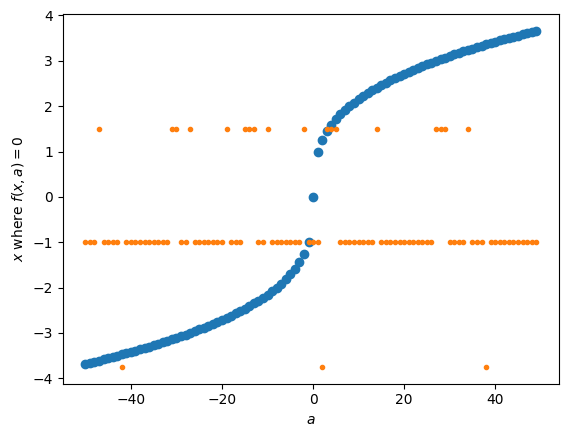

In [24]:
analytical_result = np.sign(a) * np.abs(a)**(1/3)
fig, ax = plt.subplots()
ax.plot(a, analytical_result, 'o')
ax.plot(a, vec_res, '.')
ax.set_xlabel('$a$')
ax.set_ylabel('$x$ where $f(x, a)=0$')
plt.show()